In [9]:
import timeit




import matplotlib.pyplot as plt
import numpy as np
from numba import jit

In [10]:
@jit
def distance(city1, city2):
    """returns distance between two cities in coordinates system"""
    return ((city1[0] - city2[0]) ** 2 + (city1[1] - city2[1]) ** 2) ** 0.5

In [11]:

@jit
def distance_total(cities):
    """returns distance passing through all cities in order"""
    return sum([distance(city, cities[index + 1]) for index, city in enumerate(cities[:-1])])


In [12]:

@jit
def permutations(cities):
    """returns permutations of all cities given to the method"""
    if (len(cities) <= 1):
        return [cities]
    path=[]
    for x in range(len(cities)):
        for location in permutations(cities[:x]+ cities[x + 1:]):
            path.append([cities[x]] + location)
    return path


In [15]:

@jit
def travellingSalesman(cities, start=None):
    """traveling salesman shortest roundabout"""
    if start is None:
         start = cities[0]
    distance_liste = []
    per = permutations(cities)
    #waypoints = map(lambda route: distance_total(start + route + start), per)
    for route in per:
        distance_liste.append(distance_total((start + route + start)))
        # distance_liste.append(list(distance_total((start + route + start))))

    waypoints=min(distance_liste)
    shortest_route = start + per[distance_liste.index(waypoints)] + start
    return shortest_route, waypoints
    #return min(distance_liste)
    #return min([perm for (start + perm + start) in permutations(cities) if perm[0]== start], key = distance_total)


In [25]:
def pfad_ausgabe(route):
    pointArray = np.array(route)
    plt.plot(pointArray[0, 0], pointArray[0, 1], 'ro')
    plt.plot(pointArray[1:-1, 0], pointArray[1:-1, 1], 'bo')
    plt.plot(pointArray[:, 0], pointArray[:, 1], '-k')
    plt.yticks(())
    plt.xticks(())
    plt.show()


def main():    ##waypoints probably for indivitual cities
    ##doctest.testmod()
    cities = (0.010319427306382911, 0.8956251389386756), (0.6999898714299346, 0.42254500074835377), (0.4294574582950912, 0.4568408794115657), (0.6005454852683483, 0.9295407203370832), (0.9590226056623925, 0.581453646599427), (0.748521134122647, 0.5437775417153159), (0.7571232013282426, 0.606435031856663), (0.07528757443413125, 0.07854082131763074), (0.32346175150639334, 0.7291706487873425), (0.012935451483722882, 0.974440252089956), (0.7894689664351368, 0.8925464165283283), (0.5017081207027582, 0.2323298297211428), (0.5994368069089712, 0.006438246252584379), (0.3471372841416518, 0.32362936726486546), (0.9080568556459205, 0.5872162265716462), (0.008216651916432838, 0.5605251786730867), (0.12281649843134745, 0.778836327426156), (0.9698199622470612, 0.9108771425774694), (0.22977122891732482, 0.9692739885317619), (0.8192293086323663, 0.5857981607663957), (0.1422079724040628, 0.8147259475583606), (0.6706795717064135, 0.591561956032189), (0.15756919328106178, 0.6331745919782176), (0.9932745190952539, 0.20429268341528184), (0.21104352892679712, 0.8836996377783977), (0.15162951778287448, 0.43829883402923786), (0.1014198097226855, 0.5877946138306056), (0.8961534561384676, 0.6498866051905969), (0.02348788064910401, 0.2555771312427847), (0.7629752603198586, 0.031097354437254032), (0.9202799257088203, 0.8545409146117934), (0.4740012769258859, 0.30554661789326976), (0.9662984341217945, 0.24235140218349704), (0.236385903920734, 0.8065137287975154), (0.7509340695304845, 0.9276718423781918), (0.891709366337186, 0.9691233497708065), (0.45766675798331646, 0.3966074453757069), (0.362463818656684, 0.629782983287922), (0.3895828182648007, 0.11182372435220689), (0.8007718207811885, 0.07083259575886258), (0.9395297121272306, 0.003549829042441055), (0.9990444201768337, 0.4816092706412669), (0.806664037655748, 0.45636915118812094), (0.7248316046403981, 0.4136143673445848), (0.9797254747122175, 0.5348075095243779), (0.832410347070477, 0.36236092065071435), (0.17697174259486892, 0.09903555437885947), (0.3320429025096797, 0.42538137689172295), (0.010390541304141299, 0.3196764197089256), (0.13647705960093703, 0.6166884292149969), (0.7413967117502017, 0.6758731780971651), (0.5057620560480408, 0.6176726900765315), (0.811221033004999, 0.15436803010778977), (0.5010541138760939, 0.35001152238091926), (0.9413826105193199, 0.9418596542666187), (0.891256361420491, 0.7886584654021789), (0.3676445849723219, 0.9387145658378656), (0.7976904766536591, 0.7297167662430665), (0.5966826978617474, 0.29179542156826277), (0.6209578021367281, 0.22193571777470145), (0.8298034730084203, 0.5164834220744453), (0.1974315640582841, 0.9764209254933037), (0.3181560706032852, 0.9659291942205317), (0.8665674546422951, 0.8281710981528015), (0.341232980616892, 0.5707946637100852), (0.8931358896561539, 0.40864805338293986), (0.26644032823825714, 0.9989727471390323), (0.3993087575662785, 0.009572468741341433), (0.7385521851703551, 0.8947961501854975), (0.3265958212912289, 0.12135269959328665), (0.33657186037515696, 0.04678149607307802), (0.6574688023519235, 0.14620381872693322), (0.9232073321379433, 0.464399378682132), (0.3350568606219765, 0.8140710044746052), (0.43439242705535963, 0.6850627844635814), (0.6748600302251079, 0.17179426903224415), (0.3257145924815924, 0.17892361406234325), (0.9843761318782708, 0.7246387654097534), (0.3302488609623919, 0.5461838792803725), (0.942182061647097, 0.271796972592925), (0.7992439374549364, 0.3344916623897427), (0.07722251160513627, 0.5998378921773792), (0.9551490162437984, 0.99084148343811), (0.2994585617190968, 0.8420506992016424), (0.692980959785355, 0.832838090803397), (0.31555831127132894, 0.06401272570899819), (0.02665227648457802, 0.5242147042171419), (0.1974784428862567, 0.9137326594564479), (0.8486377116437235, 0.773093204292392), (0.6588651068050204, 0.6191834372968826), (0.9294759207447961, 0.04471010558595201), (0.9407045003182903, 0.7240803846820537), (0.6814942236797052, 0.6579517970003296), (0.2956248273119104, 0.4141031496785965), (0.729642956744248, 0.18897087844791205), (0.6092213719795501, 0.12514914017649392), (0.7431271140678826, 0.12660475585183406), (0.9023640654012873, 0.21133242457776658), (0.3513947221768753, 0.10988741056845952), (0.7560785506387285, 0.1994584377393509)

    %timeit route, distance = travellingSalesman(list(cities[1:9]), list(cities[:1]))

    for ele in route:
        print(ele)
    print(distance)

    pfad_ausgabe(list(route))

544 ms ± 3.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
(0.010319427306382911, 0.8956251389386756)
(0.07528757443413125, 0.07854082131763074)
(0.4294574582950912, 0.4568408794115657)
(0.6999898714299346, 0.42254500074835377)
(0.748521134122647, 0.5437775417153159)
(0.7571232013282426, 0.606435031856663)
(0.9590226056623925, 0.581453646599427)
(0.6005454852683483, 0.9295407203370832)
(0.32346175150639334, 0.7291706487873425)
(0.010319427306382911, 0.8956251389386756)
CPUDispatcher(<function distance at 0x000001F647C46400>)


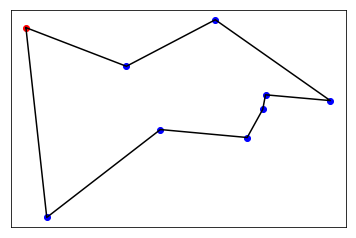

In [26]:
if __name__=="__main__":
    main()
